In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#Caminatas aleatorias y caminatas cuánticas

##Caminatas aleatorias

Podemos construir una caminata aleatoria unidimensional de la siguiente manera:

Definimos un espacio donde sucede la caminata: en este caso, una línea recta, igualmente espaciada.

El lanzamiento de una moneda decide el paso:

- Si sale cara: un paso a la derecha.
- Si sale cruz: un paso a la izquierda.

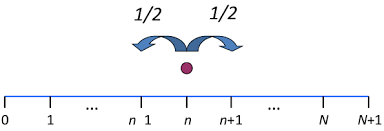

La moneda es justa, por lo que las probabilidades de que salga cara o cruz son iguales.

El problema es encontrar la probabilidad de caer en un punto determinado después de una cantidad determinada de pasos y encontrar a qué distancia estás en promedio de donde comenzaste.

¿Por qué nos interesa este juego?

Las caminatas aleatorias son fundamentales en la física estadística: ayudan a  predecir qué tan rápido se difundirá un gas en otro, qué tan rápido se propagará el calor en un sólido, qué tan grandes serán las fluctuaciones de presión en un recipiente pequeño, etc.

### Ejercicio 1:

Complete el siguiente código para implementar una caminata aleatoria en una línea recta.

In [ ]:
# Definimos el número de veces que nuestro caminante recorrerá la recta
iterations = 100000

# En cada iteración, el caminante dará un total de t pasos
t = 1000

# finalPositions es un arreglo que indica la posición final en cada repetición del experimento
finalPositions = []

In [ ]:
# Implemente la caminata aleatoria. En este momento, el objetivo es crear el arreglo de posiciones finales
# para el total de iteraciones.
# Guarde la posición final de cada experimento como un elemento de finalPositions
# Recuerde: la instrucción np.random.rand() genera números aleatorios entre 0 y 1


In [ ]:
# Obtenemos el número de caminatas que terminan en la posición n, dividida entre el total de caminatas

y = []
for i in range(min(finalPositions),max(finalPositions)):
    y.append(float(finalPositions.count(i))/iterations)

In [ ]:
x = np.linspace(min(finalPositions),max(finalPositions),int(max(finalPositions)-min(finalPositions)))

fig = plt.figure(figsize=(10,5))

plt.bar(x,y,color='blue',width=0.6)
plt.xlabel('final position')
plt.ylabel('probability of being at postion $n$')
plt.title('Classical random walk distribution')
plt.show()

## Caminatas cuánticas discretas

En el caso cuántico, la posición del caminante, $n$, en la recta es descrita por el vector $|n\rangle$ en el espacio de Hilbert $\mathcal{H}_p$, de dimensión infinita. La evolución depende de una *moneda cuántica*. El espacio de Hilbert completo es entonces $\mathcal{H}=\mathcal{H}_{moneda}\otimes\mathcal{H}_{caminante}$, donde $\mathcal{H}_{caminante}$ es un espacio de Hilbert de dimensión 2.

El desplazamiento del caminante ocurre bajo las reglas:

- Si se obtiene cara, el caminante pasa de $|n\rangle$ a $|n+1\rangle$.

- Si se obtiene cruz, el caminante pasa de $|n\rangle$ a $|n-1\rangle$.

El desplazamiento (*shift*) es descrito por el operador (unitario) $\hat S$, cuya acción es

$$\hat S|0\rangle|n\rangle = |0\rangle|n+1\rangle$$
$$\hat S|1\rangle|n\rangle = |1\rangle|n-1\rangle$$

La caminata cuántica inicia cuando aplicamos el operador $\hat C\otimes\hat I_{caminate}$ al estado inicial, siendo $\hat C$ la moneda cuántica. Después de este paso, el estado de la moneda cambia, pero el estado del caminante permanece igual. Una moneda cuántica usual es el operador de Hadamard,

$$\hat H =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}.$$

Tras lanzar la moneda, se aplica el operador de desplazamiento,

$$\hat S=|0\rangle\langle0|\otimes\sum_{n=0}^\infty|n+1\rangle\langle n|+
|1\rangle\langle1|\otimes\sum_{n=0}^\infty |n-1\rangle\langle n|.$$

La dinámica de la caminata es determinada por el operador unitario

$$U=\hat S(\hat H\otimes\hat I),$$ **sin mediciones intermedias** (en general).

Un paso consiste en aplicar $\hat U$ una vez. Después de $t$ pasos temporales, el estado del sistema es
$$|\psi(t)=\hat U^t|\psi(0)\rangle.$$

### Ejercicio 2: Muestre que, si el estado inicial es
$$|\psi(0)\rangle=|0\rangle|n=0\rangle,$$
entonces
$$|\psi(1)\rangle=\frac{1}{\sqrt{2}}\big(|1\rangle|-1\rangle+|0\rangle|1\rangle\big)$$
$$|\psi(1)\rangle=\frac{1}{2}\big(-|1\rangle|-2\rangle+(|0\rangle+|1\rangle)|0\rangle+|0\rangle|2\rangle\big)$$
$$|\psi(1)\rangle=\frac{1}{2\sqrt{2}}\big(|1\rangle|-3\rangle-|0\rangle|-1\rangle+(2|0\rangle+|1\rangle)|1\rangle+|0\rangle|3\rangle\big)$$

### Ejercicio 2: implemente el operador *shift*

$$\hat S=|0\rangle\langle0|\otimes\sum_{n=0}^\infty|n+1\rangle\langle n|+
|1\rangle\langle1|\otimes\sum_{n=0}^\infty|n-1\rangle\langle n|$$

*Hint: la instrucción np.outer(vector1,vector2) realiza el producto exterior de los vectores correspondientes.*

##Simulación de una caminata cuántica

Iniciamos el producto tensorial $\hat H\otimes\hat I$.

En este ejercicio trabajaremos en una recta que va de -3 a +3, así que haremos $n=7$.

In [ ]:
n = 7 # Representamos una caminata entre -25 y +25

H = [[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]]
HoI = np.kron(H,np.eye(n))

Los estados $|n\rangle$ quedan definidos a través de los siguientes vectores:

In [ ]:
def generate_basis(n):
    # Creamos una lista de n vectores con 1 en la i-ésima entrada
    basis_vectors = []
    for i in range(n):
        vector = np.zeros(n)
        vector[i] = 1
        basis_vectors.append(vector)
    return basis_vectors


vector = generate_basis(n)

### Ejercicio 3: implemente el operador *shift*

$$\hat S=|0\rangle\langle0|\otimes\sum_{n=0}^\infty|n+1\rangle\langle n|+
|1\rangle\langle1|\otimes\sum_{n=0}^\infty|n-1\rangle\langle n|$$

*Hint: la instrucción np.outer(vector1,vector2) realiza el producto exterior de los vectores correspondientes.*

In [ ]:
#Implemente el operador shift

Ahora definimos el operador de evolución, $U=\hat S(\hat H\otimes\hat I)$

In [ ]:
U = np.matmul(shift,HoI)

Inicializamos el sistema en el estado

$$|\psi(0)\rangle = |0\rangle\otimes|3\rangle$$

In [ ]:
psi = np.kron([1,0],vector[n//2])

### Ejercicio 3: cree una función que evolucione al sistema

$$|\psi(t)\rangle = U^t|\psi(0)\rangle$$

In [ ]:
# la función debe recibir como argumentos el número de pasos, time_steps, un estado inicial y el operador de evolución, U.

def system_evolution(time_steps,initial_state,U):

Verifiquemos la implementación, para $t=0,1,2,3$

In [ ]:
time_steps = 1
final_state = system_evolution(time_steps,psi,U)
print(final_state)

###Ejercicio 4*: ¿Cómo puede simular una medición sobre un estado $|n\rangle$?